# Activity 1: IPython i Jupyter

Zademonstrujmy powszechny rozwój języka Python w IPython i Jupyter. Zaimportujemy NumPy,
zdefiniuj funkcję i iteruj wyniki.

1. Aby zaimportować NumPy, użyj:

In [2]:
import numpy as np

2. Utwórz funkcję kwadratPlus(x,c), która obliczy wartość: y=x^2+c

In [3]:
def squarePlus(x,c):
    y = x^2 + c
    return y

3. Uruchom swój kod w IPythonie i Jupyterze

In [4]:
squarePlus(2,1)

1

# Activity 2: Praca z problemami z danymi

Przed rozpoczęciem analizy musimy sprawdzić, czy nie występują problemy z danymi, a kiedy je znajdziemy (co jest bardzo powszechne!), musimy rozwiązać problemy, przekształcając ramkę DataFrame. Można to zrobić w jeden sposób oznacza to na przykład zastosowanie funkcji do kolumny lub całej ramki DataFrame. Jest to powszechne niektóre liczby w ramce danych po jej odczytaniu nie są poprawnie konwertowane na liczby zmiennoprzecinkowe liczby. Rozwiążmy ten problem, stosując funkcje:

1. Zaimportuj Pandas i bibliotekę numpy.

In [5]:
import pandas as pd
import numpy as np

2. Przeczytaj zbiór danych RadNet udostępniony przez Agencję Ochrony Środowiska Stanów Zjednoczonych.

In [6]:
df = pd.read_csv('RadNet_Laboratory_Analysis.csv')
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


3. Utwórz listę z kolumnami numerycznymi dla radionuklidów w zbiorze danych RadNet.

In [7]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [8]:
columns = df.columns
id_cols = ['State', 'Location', 'Date Posted', 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns)-set(id_cols))
columns

['I-132',
 'Cs-136',
 'Co-60',
 'Te-132',
 'Ba-140',
 'Cs-137',
 'I-131',
 'I-133',
 'Cs-134',
 'Te-129m',
 'Te-129']

4. Użyj metody Apply w jednej kolumnie z funkcją lambda, która porównuje wartość Brak wykrycia
strunowy

In [9]:
# lambda
func = lambda x: x**2 if x>10 else x
func(29)

841

In [10]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df['Cs-134'].head()

0       NaN
1       NaN
2    0.0057
3       NaN
4       NaN
Name: Cs-134, dtype: object

5. Użyj metody Applymap, aby zamienić wartości tekstowe „Non-detect” na .np.nan we wszystkich numerach
kolumn na raz, zrób to samo z wartością „ND”.

In [11]:
df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df.loc[:,columns].head()

/tmp/ipykernel_1317/1917651076.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)


,I-132,Cs-136,Co-60,Te-132,Ba-140,Cs-137,I-131,I-133,Cs-134,Te-129m,Te-129
0,NaN,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0043,NaN,0.0074,0.067,NaN,0.0057,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN


6. Użyj tej samej metody Applymap, aby usunąć wszystkie spacje (od początku i końca) we wszystkich pozostałych
kolumny (nienumeryczne). Użyj metody strip(), aby usunąć spacje.

In [12]:
df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())
df.loc[:,id_cols].head()

/tmp/ipykernel_1317/2596169239.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())


,State,Location,Date Posted,Date Collected,Sample Type,Unit
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3


Dodatkowo:
7. Zmień typy danych kolumn za pomocą metod (użyj df.dtypes() do sprawdzenia typów danych):

pd.to_datetime()
pd.to_numeric()

In [13]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [14]:
df

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
1,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,CA,Richmond,2011-04-25,2011-04-14,Precipitation,pCi/l,NaN,NaN,8.9000,NaN,7.9000,5.900,NaN,NaN,NaN,NaN,NaN
602,CA,Richmond,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,6.6000,NaN,5.8000,NaN,NaN,NaN,NaN,NaN,NaN
603,UT,Salt Lake City,2011-05-24,2011-04-14,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,UT,Salt Lake City,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ćwiczenie 3. Wykreślanie danych za pomocą Pandas

1. Skorzystaj z RadNet DataFrame, z którym pracowaliśmy.

2. Jak widzieliśmy wcześniej, napraw wszystkie problemy z typami danych.

3. Utwórz wykres z filtrem według lokalizacji, wybierając miasto San Bernardino i jedno radionuklid, z osią x ustawioną na datę i osią y z radionuklidem I-131.

<Axes: xlabel='Date Collected'>

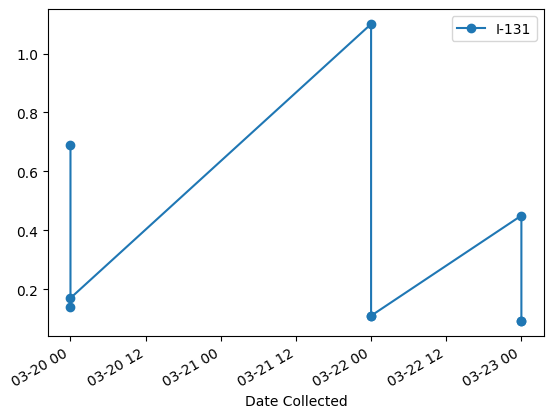

In [15]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131', marker='o')

4. Utwórz wykres za pomocą pliku matplotlib.plt - w stylu Matlab - z koncentracją dwóch powiązanych radionuklidy I-131 i I-132.

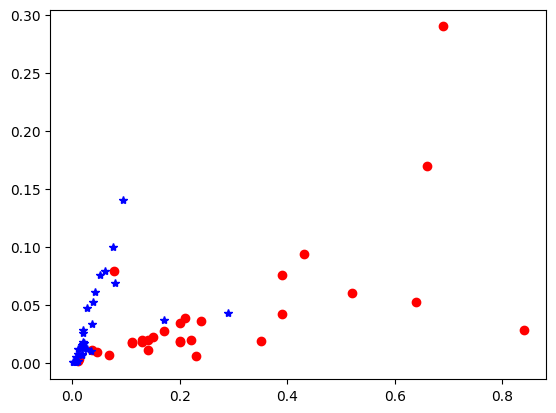

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['I-131'], df['I-132'], 'ro')
plt.plot(df['I-132'],df['Cs-134'],'b*')

5. Utwórz wykres punktowy ze stężeniami dwóch powiązanych radionuklidów, I-131 i I-132:

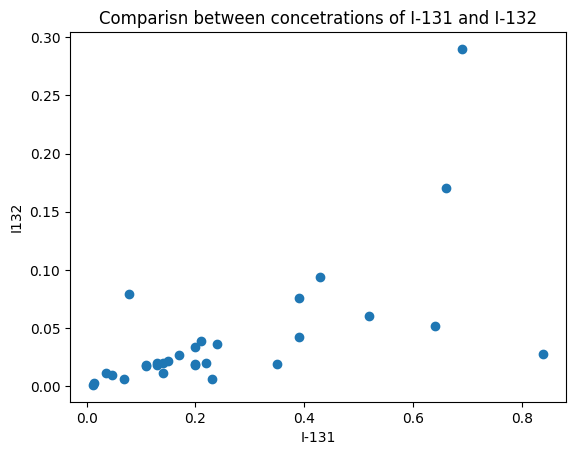

In [19]:
ig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I132',
    title='Comparisn between concetrations of I-131 and I-132'
)

# Ćwiczenie 4: Wykresy liniowe z obiektowym API i Pandas Ramki danych

W tym ćwiczeniu najpierw utworzymy wykres liniowy szeregów czasowych na podstawie zbioru danych pliku „cars.data”. Przykład kreślenia przy użyciu pand i obiektowego API. Ten rodzaj wykresu jest powszechny w
analizy i pomaga odpowiedzieć na pytania takie jak „czy średnia moc wzrasta, czy maleje
z czasem?"

Teraz postępuj zgodnie z poniższymi procedurami, aby wykreślić wykres średniej mocy rocznej za pomocą Pandas i podczas korzystania z obiektowego API.

1. Zaimportuj wymagane biblioteki do notatnika Jupyter i odczytaj zbiór danych z pliku cars.data
repozytorium zbiorów danych: matplotlib, numpy, pandas. Załaduj dane do ramki danych pandy z pliku: samochody.data

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'cars_headers.csv'
df = pd.read_csv(url)

In [8]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


2. Podaj nazwy kolumn, aby uprościć zbiór danych, jak pokazano poniżej:

In [5]:
column_names = ['mpg', 'cylinders', 'displacement [cu]', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

3. Teraz ponownie przeczytaj nowy zbiór danych z nazwami kolumn i wyświetl go.

In [11]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
df.dtypes()

Unnamed: 0        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [16]:
'12.0'.isdigit()

False

In [18]:
'12.0'.replace('.','').isdigit()

True

In [ ]:
df.horsepower.apply(lambda x:x.replace('.','').isdigit()==False)

In [ ]:
nondigits = df.horsepower.apply(lambda x:x.replace('.','').isdigit()==False)
df[nondigits]

4. Istnieją pewne wartości mocy ustawione na „?”. Zmień je na NaN.

In [23]:
df.loc[df.horsepower=='?','horsepower'] = np.nan

In [24]:
df.loc[df.horsepower=='?']

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


5. Konwertuj wartości mocy na numeryczne

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

6. Spójrz na wartość roku. jest podany częściowo bez tysięcy i setek. Zamień je na cały rok np.: 70 do 1970, 82 do 1982 itd. Utwórz nową kolumnę „full_date” i wypełnij ją na podstawie wartości kolumny „rok”:

In [ ]:
df['full_date'] = pd.to_datetime(df.year, format='%y')

Wypełnij kolumnę „rok” rokiem od pełnej daty utworzonej wcześniej:

In [ ]:
df['year'] = df['full_date'].dt.year

7. Sprawdź swoje zmiany.

In [36]:
df

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,full_date
0,0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu,1970-01-01
1,1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320,1970-01-01
2,2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite,1970-01-01
3,3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst,1970-01-01
4,4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86.0,2790.0,15.6,1982,1,ford mustang gl,1982-01-01
394,394,44.0,4,97.0,52.0,2130.0,24.6,1982,2,vw pickup,1982-01-01
395,395,32.0,4,135.0,84.0,2295.0,11.6,1982,1,dodge rampage,1982-01-01
396,396,28.0,4,120.0,79.0,2625.0,18.6,1982,1,ford ranger,1982-01-01


8. Teraz zbiór danych jest gotowy do tworzenia wykresów. Wykreśl średnią moc roczną, korzystając z poniższego wzoru Komendy:

<Axes: xlabel='year'>

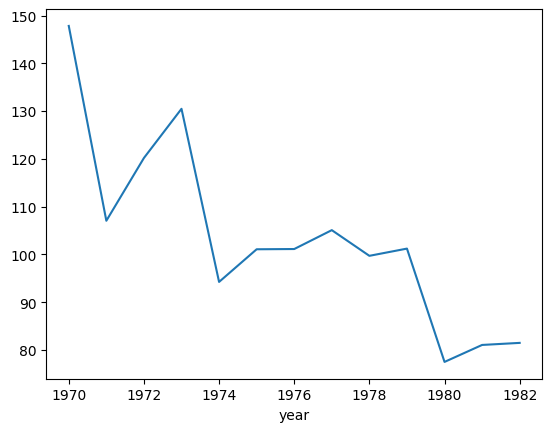

In [30]:
df.groupby('year')['horsepower'].mean().plot()

9. Spróbuj wykreślić średnią moc, przyspieszenie i mpg rocznie. Pokaż to na jednej działce. Skorzystaj z groupby. To powinna być tylko jedna linia kodu

<Axes: xlabel='year'>

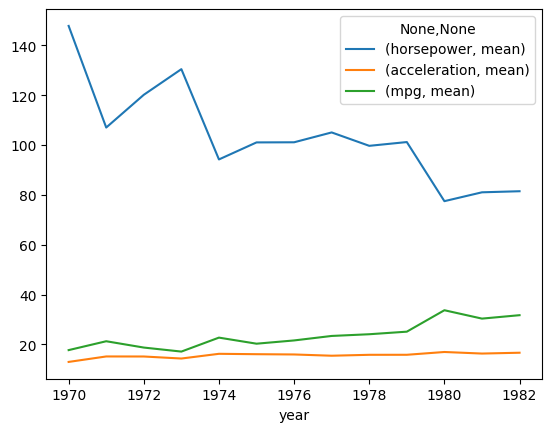

In [38]:
df.groupby('year').agg({'horsepower':['mean'], 'acceleration':['mean'], 'mpg':['mean']}).plot()

In [39]:
df.groupby('year').agg({'horsepower':['std'], 'acceleration':['std'], 'mpg':['std']}).head(50)

,horsepower,acceleration,mpg
,std,std,std
year,,,
1970,53.734844,3.330982,5.339231
1971,38.566109,2.666171,6.591942
1972,41.121368,2.850032,5.435529
1973,46.412304,2.754222,4.700245
1974,29.686775,1.688532,6.420010
1975,26.577062,2.471737,4.940566
1976,32.430592,2.801419,5.889297
1977,36.095479,2.273391,6.675862


Scatter plots

Wykresy punktowe pomagają nam zrozumieć korelację między dwiema zmiennymi. Umożliwiają dystrybucję
punktów, które trzeba zobaczyć. Przykłady tworzenia wykresów punktowych przy użyciu różnych bibliotek:
1. Matplotlib

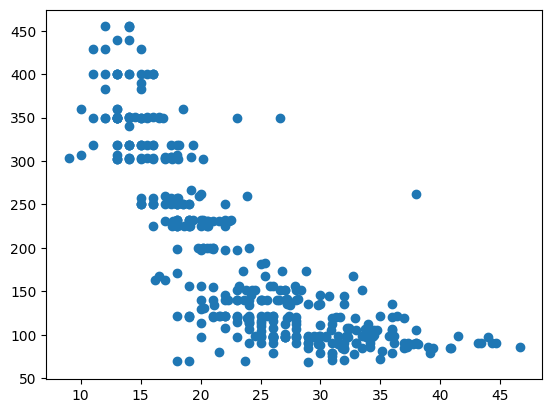

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = df['mpg'], y=df['displacement'])

2. Ramka danych Pandy